#### Pixel value plotter
Extract values from a single position in a thermal avi and plot it

In [3]:
# Installed scikit-video (skvideo) and ffmpeg from conda
# https://anaconda.org/conda-forge/sk-video
# https://anaconda.org/conda-forge/ffmpeg

import skvideo.io
import matplotlib.pyplot as plt

# Frame check if necessary
def frame_check(file_name, number):
    frames = skvideo.io.vread(file_name, as_grey = True)
    image = frames[number].squeeze()
    image = image[:]
    plt.figure(figsize = (15,10))
    plt.imshow(image)
    plt.colorbar()

def pixel_plot(file_name, coords = (300, 300)):
    '''
    Extract a sequence of values from a pixel at (coords) in file_name
    Return a list of pixel values by frame
    '''
    
    frames = skvideo.io.vread(file_name, as_grey = True)
    pixel_values = []
    for i in frames:
        pixel_values.append(i.squeeze()[coords[0]][coords[1]])
    return pixel_values

# filename = 'Post ResearchIR 4 Heat Test.avi'
# filename = 'Post ResearchIR 4 No Heat Test.avi'
filename = 'case1.avi'
test = pixel_plot(filename)

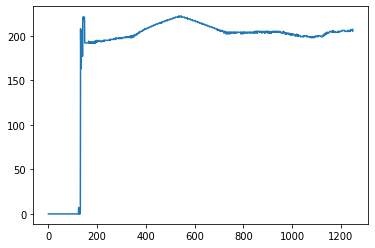

In [4]:
plt.plot(test[:])
# plt.ylim(0,60)
# plt.xlim(0,300)
plt.show()

In [5]:
test[600]

217

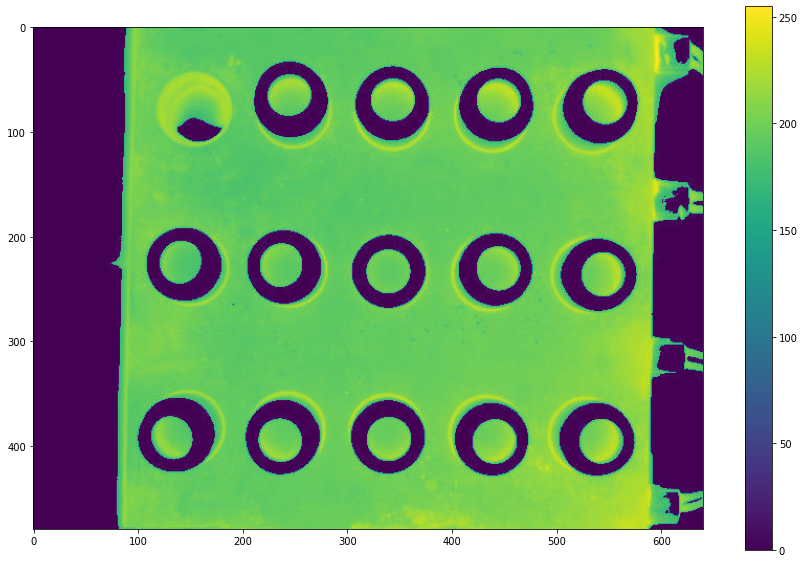

In [10]:
frame_check(filename, 200)

In [11]:
frames = skvideo.io.vread(filename, as_grey = True)

In [12]:
frames.shape

(1250, 480, 640, 1)

In [13]:
image = frames[100].squeeze()
# rr, cc = disk((200, 200), 100, shape=img.shape)
# img[rr, cc, :] = (1, 1, 0)

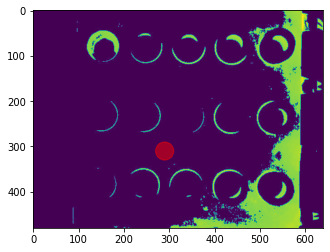

In [14]:
import matplotlib.patches as patches

# Define a patch
xy = (290, 310)
patch = patches.Circle(xy, radius = 20, color = 'r', alpha = 0.5)

# Show the patch over the frame
fig, axes = plt.subplots()
axes.imshow(image)
axes.add_patch(patch)
# axes.scatter(290,310, color='r')

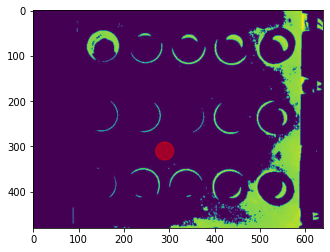

In [15]:
# Define a region usign skimage.draw and get properties with regionprops
# skimage.draw and patches use opposite coordinate conventions. Here use x,y

from skimage.draw import disk

image = frames[100].squeeze().copy() # If not copied, frames is changed

xy = (290, 310)
# xy = (300, 300)

rr, cc = disk((xy[1], xy[0]), 20)
image[rr, cc] = 1

# Define a patch
patch = patches.Circle(xy, radius = 20, color = 'r', alpha = 0.5)

fig, axes = plt.subplots()
axes.imshow(image)
axes.add_patch(patch)
plt.show()

## Definining a region for pixel average measurements

https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_regionprops.html#sphx-glr-auto-examples-segmentation-plot-regionprops-py
* Draw a blank image
* Define regions using skimage.draw
* Label region using skimage.label
* regionprops can then be used on all frames with the region defined by label

In [16]:
import numpy as np
from skimage.measure import label, regionprops

blank = np.zeros(image.shape)

xy = (290, 310)
rr, cc = disk((xy[1], xy[0]), 20)

blank[rr,cc] = 1

label_img = label(blank)
# plt.imshow(label_img)

regions = regionprops(label_img)


Plot average intensity from region

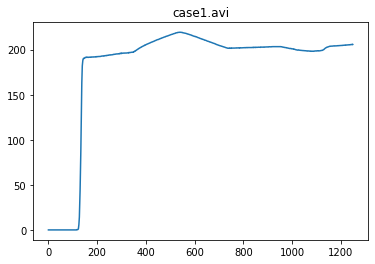

In [17]:
# Read out all of the regions' time series
# Remember to crop intensity image if necessary

temps = []

for i in frames.squeeze():
    regions = regionprops(label_img, intensity_image = i)
    temps.append([i.mean_intensity for i in regions])
    
for j in range(len(regions)):
    x = [i[j] for i in temps]
    plt.figure(figsize=(6,4))
    plt.plot(x)
    plt.title(filename)
    plt.show()

## Plot a montage of frames

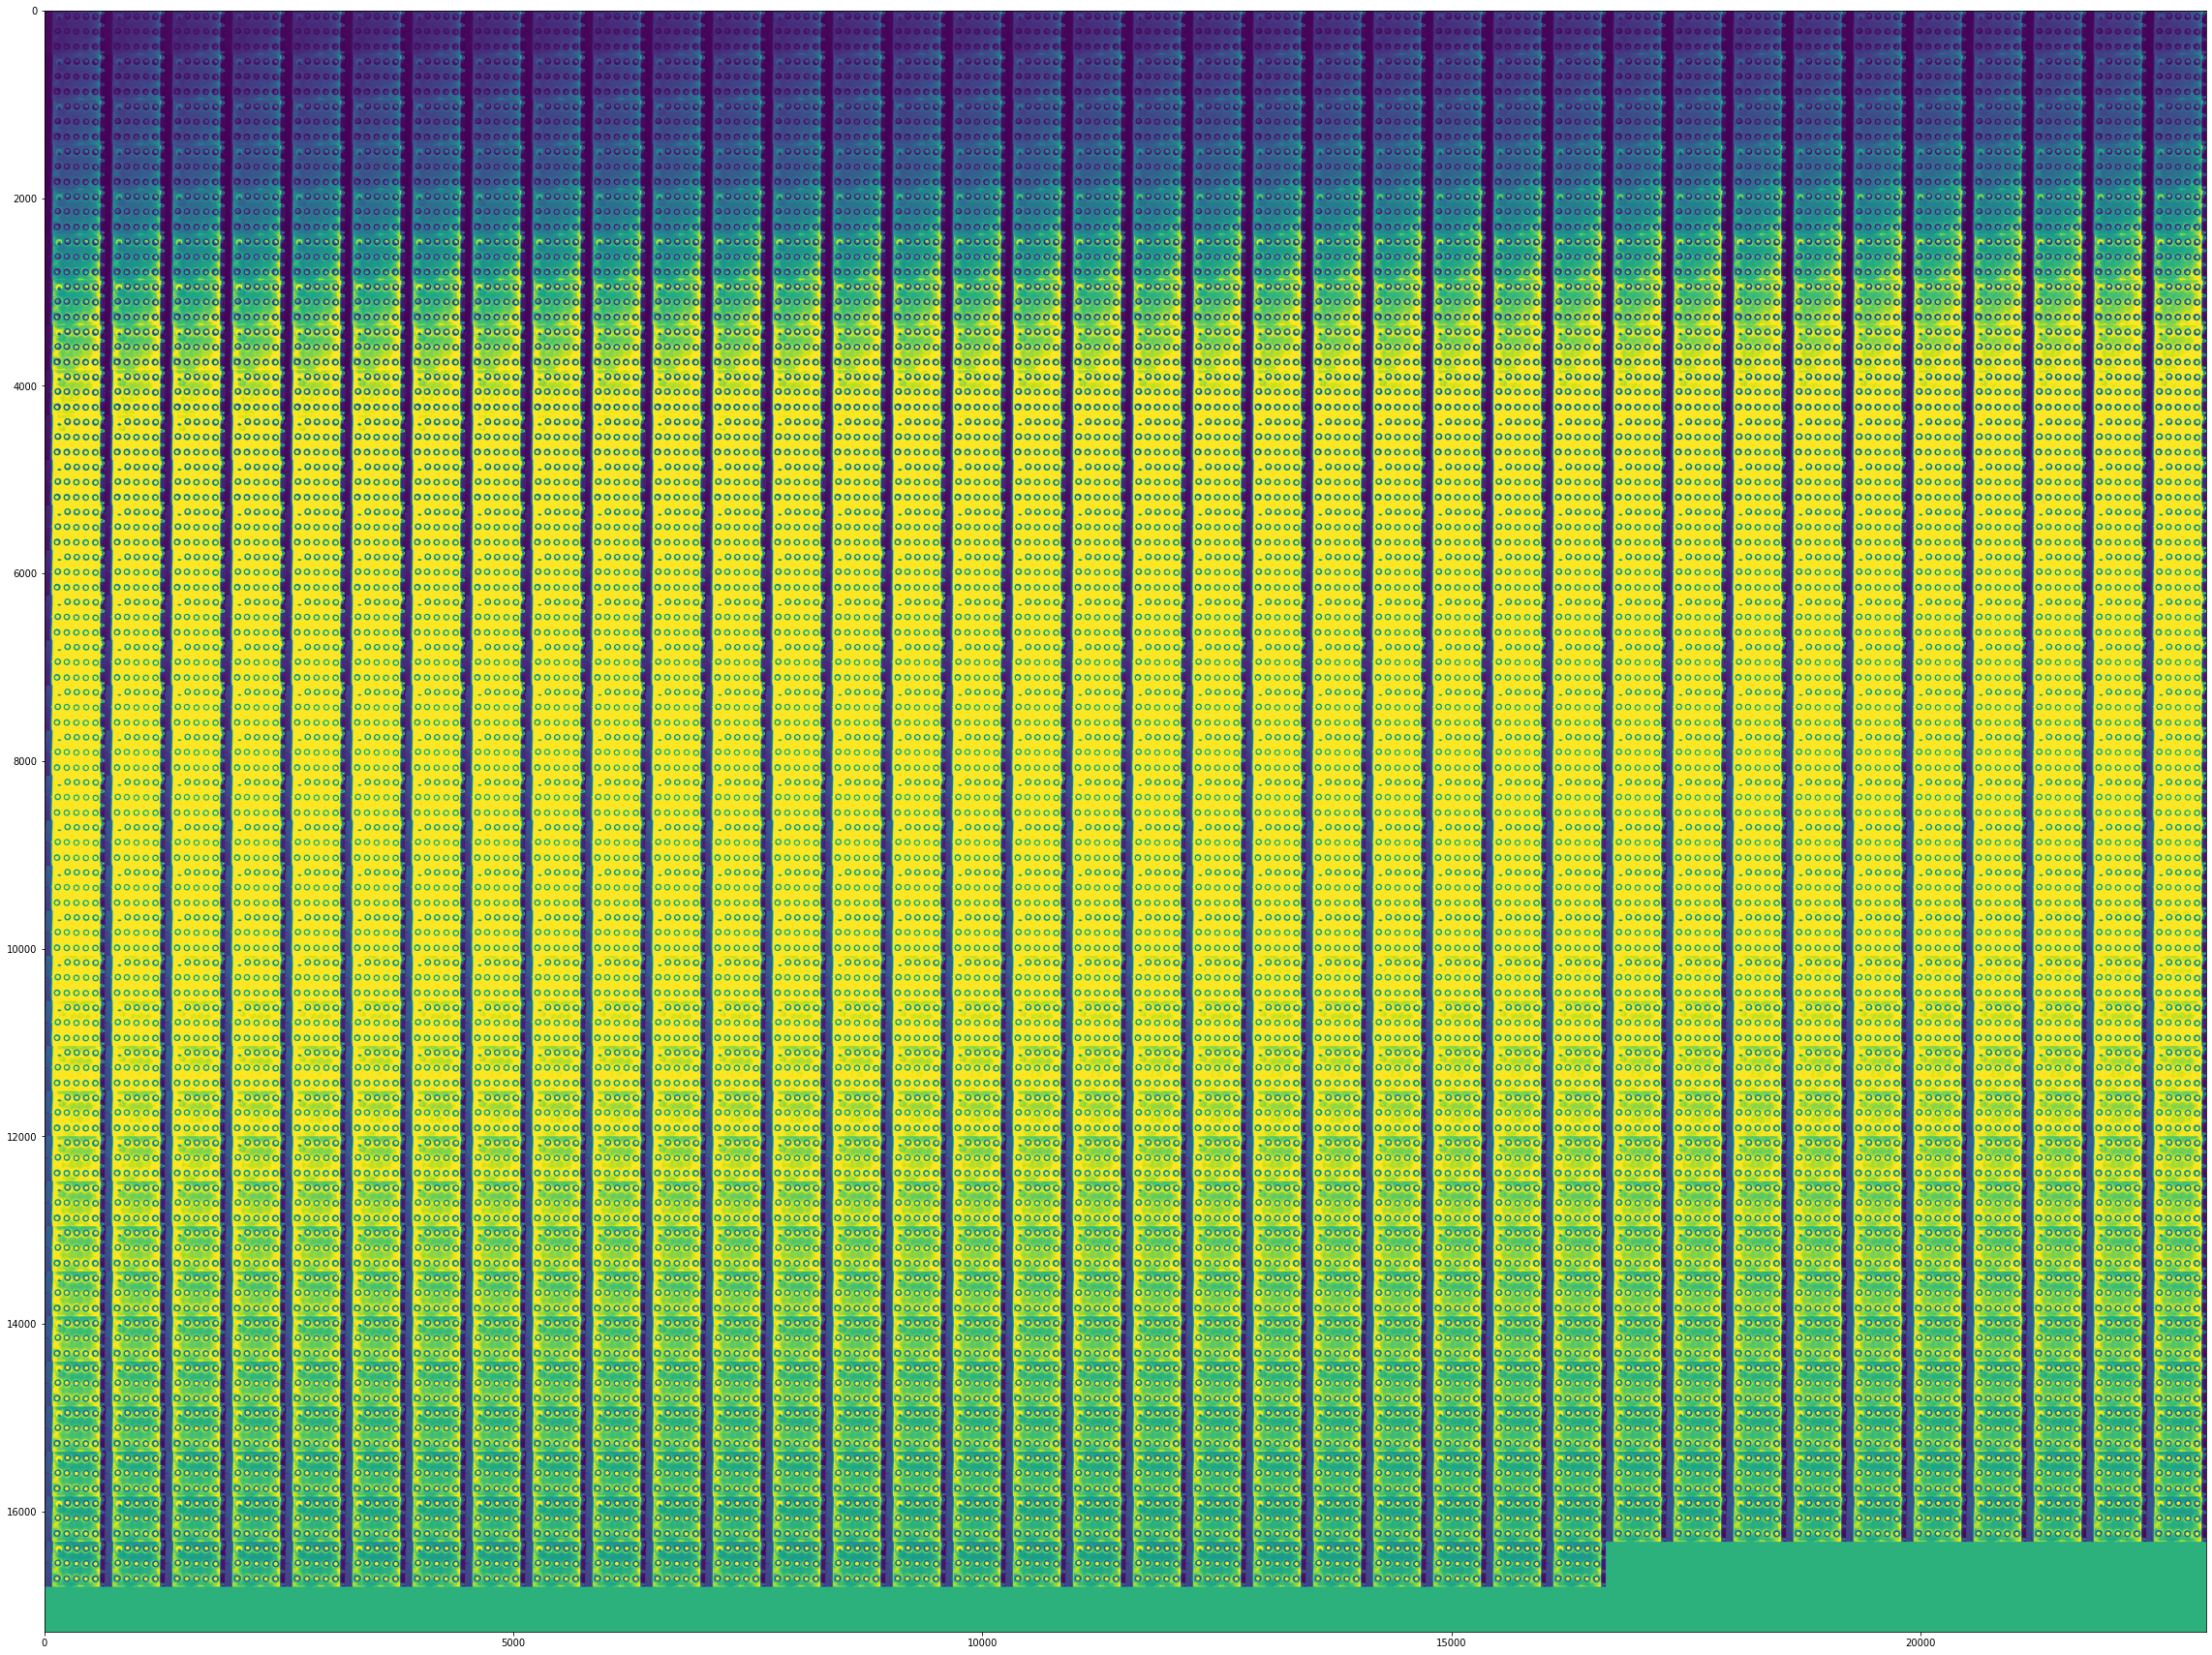

In [14]:
# Plot montage of frames to compare

from skimage.util import montage

images = frames[:].squeeze()

out = montage(images)

plt.figure(figsize=(40,40))
plt.imshow(out)
plt.savefig('radiometric.png')
plt.show()
